In [1]:
import sklearn
print('Hi')
print(sklearn.__version__)

Hi
0.24.2


## Create Modells

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.neural_network import MLPRegressor

from autosklearn.regression import AutoSklearnRegressor
import autosklearn.metrics

from pathlib import Path

import time # localtime to unix time

noise = 0
folderinput = "../workdir/AIS-ModelFrames/"
folderoutput = "../workdir/AIS-TrainedModel/"

filename = "aisdk-2023-11-08_1_kkn"

for known in range(12, 2, -1):

    train = pd.read_csv(folderinput+filename+"_train_"+str(known)+"_0.csv")
    test = pd.read_csv(folderinput+filename+"_test_"+str(known)+"_0.csv")

    train_y = train.loc[:,["output_x","output_y"]]
    test_y = test.loc[:,["output_x","output_y"]]
    train_x = train.drop(columns=["output_x","output_y"])
    test_x = test.drop(columns=["output_x","output_y"])

    test = []
    train = []

    df_res = test_y.copy()

    df_res.rename(columns={"output_x": "known_"+str(known)+"_0", "output_y": "noise_"+str(known)+"_0"}, inplace=True)

    df_res[f"known_"+str(known)+"_0"] = known
    df_res[f"noise_"+str(known)+"_0"] = noise
    print("init "+str(known)+" "+str(noise) + " " + time.ctime(time.time())) 

    # linear regression

    path = Path(folderoutput+filename+"_lin_"+str(known)+"_0.csv")
    if not path.exists():  

        linearpipe = Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])
        linearpipe.fit(train_x, train_y)
        pickle.dump(linearpipe, open(path, 'wb'))
        linearpipe = []
    print("lin "+str(known)+" "+str(noise) + " " + time.ctime(time.time())) 

    # Multi-layer Perceptron

    path = Path(folderoutput+filename+"_mlp_"+str(known)+"_0.csv")
    if not path.exists(): 

        mlppipe = Pipeline([("scaler", StandardScaler()), ("regressor", MLPRegressor((50)))])
        mlppipe.fit(train_x, train_y)
        pickle.dump(mlppipe, open(path, 'wb'))
        mlppipe = []
    print("mlp "+str(known)+" "+str(noise) + " " + time.ctime(time.time())) 

    # autosklearn

    runduraction = 3600*5#2
    memory = 10*1024
    path = Path(folderoutput+filename+"_autosk_"+str(known)+"_0_"+str(runduraction)+"_"+str(memory)+".csv")

    if not path.exists(): 
        automl = AutoSklearnRegressor(
            time_left_for_this_task=runduraction, memory_limit=memory, n_jobs=-1, metric=autosklearn.metrics.mean_squared_error
            #time_left_for_this_task=3600, memory_limit=80*1024, n_jobs=-1, metric=autosklearn.metrics.mean_squared_error
            )
        automl.fit(train_x, train_y, dataset_name=f'known{known}')

        ensemble_dict = automl.show_models()
        print(ensemble_dict)
        pickle.dump(automl, open(path, 'wb'))
        automl = []


     
    print("sklearn "+str(known)+" "+str(noise) + " " + time.ctime(time.time()))   

init 12 0 Fri Jan 24 11:24:55 2025
lin 12 0 Fri Jan 24 11:24:55 2025
mlp 12 0 Fri Jan 24 11:24:55 2025
[WARNING] [2025-01-24 11:25:09,549:Client-AutoML(1):known12] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17995.410707)
[WARNING] [2025-01-24 11:25:09,549:Client-AutoML(1):known12] Capping the per_run_time_limit to 8997.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-24 11:25:09,984:Client-AutoMLSMBO(1)::known12] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-24 11:25:21,932:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 11:25:26,357:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 11:25:34,648:Client-EnsembleBuilder] No ru

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 11 0 Fri Jan 24 16:53:38 2025
[WARNING] [2025-01-24 16:53:49,985:Client-AutoML(1):known11] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.094015)
[WARNING] [2025-01-24 16:53:49,985:Client-AutoML(1):known11] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-24 16:53:50,547:Client-AutoMLSMBO(1)::known11] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-24 16:54:01,296:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 16:54:05,356:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 16:54:18,253:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 16:

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 10 0 Fri Jan 24 22:22:06 2025
[WARNING] [2025-01-24 22:23:32,328:Client-AutoML(1):known10] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.297691)
[WARNING] [2025-01-24 22:23:32,328:Client-AutoML(1):known10] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-24 22:23:32,857:Client-AutoMLSMBO(1)::known10] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-24 22:23:43,552:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 22:23:47,425:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 22:23:53,711:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-24 22:

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 9 0 Sat Jan 25 03:52:04 2025
[WARNING] [2025-01-25 03:52:41,787:Client-AutoML(1):known9] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.443505)
[WARNING] [2025-01-25 03:52:41,787:Client-AutoML(1):known9] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 03:52:42,103:Client-AutoMLSMBO(1)::known9] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 03:53:00,857:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 03:53:04,281:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 03:53:08,560:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 03:53:1

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 8 0 Sat Jan 25 09:07:31 2025
[WARNING] [2025-01-25 09:08:40,538:Client-AutoML(1):known8] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.711838)
[WARNING] [2025-01-25 09:08:40,538:Client-AutoML(1):known8] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 09:08:40,864:Client-AutoMLSMBO(1)::known8] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 09:08:49,387:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 09:08:54,081:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 09:09:00,249:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 09:09:0

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 7 0 Sat Jan 25 14:23:51 2025
[WARNING] [2025-01-25 14:25:45,916:Client-AutoML(1):known7] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17996.948605)
[WARNING] [2025-01-25 14:25:45,916:Client-AutoML(1):known7] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 14:25:46,140:Client-AutoMLSMBO(1)::known7] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 14:25:54,308:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 14:25:58,889:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 14:26:20,522:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 14:26:2

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 6 0 Sat Jan 25 19:39:44 2025
[WARNING] [2025-01-25 19:40:12,452:Client-AutoML(1):known6] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.282395)
[WARNING] [2025-01-25 19:40:12,452:Client-AutoML(1):known6] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-25 19:40:12,719:Client-AutoMLSMBO(1)::known6] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-25 19:40:20,394:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 19:40:24,304:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 19:40:29,211:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-25 19:40:3

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 5 0 Sun Jan 26 00:54:05 2025
[WARNING] [2025-01-26 00:54:16,578:Client-AutoML(1):known5] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.402700)
[WARNING] [2025-01-26 00:54:16,578:Client-AutoML(1):known5] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-26 00:54:16,787:Client-AutoMLSMBO(1)::known5] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-26 00:54:23,261:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 00:54:27,965:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 00:54:33,745:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 00:54:4

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 4 0 Sun Jan 26 06:07:24 2025
[WARNING] [2025-01-26 06:07:41,531:Client-AutoML(1):known4] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.684838)
[WARNING] [2025-01-26 06:07:41,531:Client-AutoML(1):known4] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-26 06:07:41,741:Client-AutoMLSMBO(1)::known4] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-26 06:07:47,431:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 06:07:51,571:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 06:07:55,402:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 06:08:0

/home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp 3 0 Sun Jan 26 11:20:13 2025
[WARNING] [2025-01-26 11:20:26,577:Client-AutoML(1):known3] Time limit for a single run is higher than total time limit. Capping the limit for a single run to the total time given to SMAC (17997.949577)
[WARNING] [2025-01-26 11:20:26,577:Client-AutoML(1):known3] Capping the per_run_time_limit to 8998.0 to have time for a least 2 models in each process.
[WARNING] [2025-01-26 11:20:26,761:Client-AutoMLSMBO(1)::known3] Could not find meta-data directory /home/sebastian/Dokumente/Python-Git/py-ma-git/venv/lib/python3.9/site-packages/autosklearn/metalearning/files/mean_squared_error_multioutput.regression_dense
[WARNING] [2025-01-26 11:20:32,293:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 11:20:35,339:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 11:20:39,137:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2025-01-26 11:20:4

## Check Modells under noise

In [1]:
import numpy as np
import pandas as pd

folder = "../workdir/AIS-ModelFrames/"
filename = f"aisdk-2023-11-08_1_kkn"


for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        test = pd.read_csv(f"{folder}{filename}_test_{known}_{noise}.csv")
        test_y = test.loc[:,["output_x","output_y"]]
        test_x = test.drop(columns=["output_x","output_y"])

        # Baseline
        dummy_prediction = test_x.loc[:,[f"input_{known-1}_x", f"input_{known-1}_y"]]
        df_res[f"bl_{known}w{noise}"] = np.sqrt((test_y["output_x"] - dummy_prediction[f"input_{known-1}_x"])**2 + (test_y["output_y"] - dummy_prediction[f"input_{known-1}_y"])**2)

        # Linear Regression
        linReg = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_lin_{known}_0.csv", 'rb'))
        df = pd.DataFrame(linReg.predict(test_x))
        df.columns = [f"lin_x_{known}_{noise}", f"lin_y_{known}_{noise}"]
        df_res[f"lr_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"lin_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"lin_y_{known}_{noise}"])**2)

        # Neural Network
        mlppipe = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_mlp_{known}_0.csv", 'rb'))
        df = pd.DataFrame(mlppipe.predict(test_x))
        df.columns = [f"mlp_x_{known}_{noise}", f"mlp_y_{known}_{noise}"]
        df_res[f"ml_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"mlp_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"mlp_y_{known}_{noise}"])**2)
        
        # AutoSklearn
        automl = pickle.load(open(f"../workdir/AIS-TrainedModel/{filename}_autosk_{known}_0_18000_10240.csv", 'rb'))
        df = pd.DataFrame(automl.predict(test_x))
        df.columns = [f"autosk_x_{known}_{noise}", f"autosk_y_{known}_{noise}"]
        df_res[f"as_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"autosk_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"autosk_y_{known}_{noise}"])**2)
        

        df_tmp = df_res.copy()
        df_res = []
        df_res = df_tmp.copy()
        df_tmp = []

        df_tmp = df_res.copy()
        df_res = df_tmp.copy()

        print(f"Known: {known}, Noise: {noise}")   
         
df_res.to_csv(f"../workdir/AIS-TrainedModel/{filename}_result_18000_10240.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: '../workdir/AIS-ModelFrames/aisdk-2023-11-08_1_kkn_test_3_0.csv'

## Analysis

In [5]:
import pandas as pd

folder = "../workdir/AIS-TrainedModel/"
filename = f"aisdk-2023-11-08_1_kkn"

df_res = pd.read_csv(f"{folder}{filename}_result_18000_10240.csv")

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        for model in ["bl", "lr", "ml", "as"]:
            print(f"{model}_{known}w{noise}")
            print(df_res[f"{model}_{known}w{noise}"].describe())

bl_3w0
count    1.112344e+06
mean     2.909283e+01
std      2.580962e+01
min      0.000000e+00
25%      4.638965e+00
50%      2.269097e+01
75%      4.984155e+01
max      2.999323e+02
Name: bl_3w0, dtype: float64
lr_3w0
count    1.112344e+06
mean     8.837056e+00
std      1.310551e+01
min      7.363258e-04
25%      1.428050e+00
50%      3.766015e+00
75%      1.011780e+01
max      2.624741e+02
Name: lr_3w0, dtype: float64
ml_3w0
count    1.112344e+06
mean     3.698418e+00
std      4.892294e+00
min      3.548020e-04
25%      1.080575e+00
50%      2.188350e+00
75%      4.696698e+00
max      1.460685e+02
Name: ml_3w0, dtype: float64
as_3w0
count    1.112344e+06
mean     4.179343e+00
std      5.654623e+00
min      1.177057e-03
25%      1.175206e+00
50%      2.509872e+00
75%      5.210507e+00
max      1.987954e+02
Name: as_3w0, dtype: float64
bl_3w5
count    1.112344e+06
mean     3.073298e+01
std      2.486576e+01
min      3.219377e-03
25%      8.615625e+00
50%      2.393974e+01
75%      5.01

In [ ]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
from numpy.random import uniform
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats



NameError: name 'create_uniform_particles' is not defined

final position error, variance:
	 [-0.10621456  0.1061402 ] [0.00859646 0.00757081]


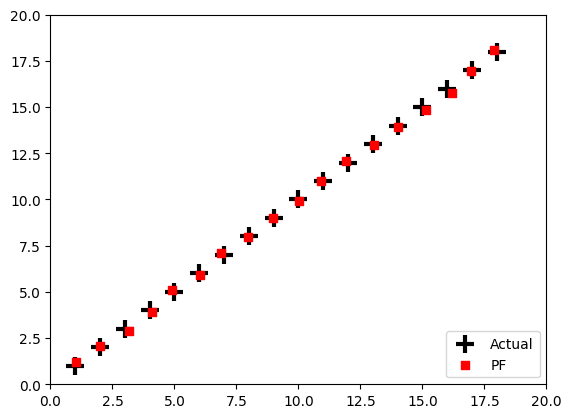

In [18]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
from numpy.random import uniform
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats




def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # avoid round-off to zero
    weights /= sum(weights) # normalize


def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var


def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles

def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist


def neff(weights):
    return 1. / np.sum(np.square(weights))

def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights.resize(len(particles))
    weights.fill (1.0 / len(weights))

def run_pf1(N, iters=18, sensor_std_err=.1, 
            do_plot=True, plot_particles=False,
            xlim=(0, 20), ylim=(0, 20),
            initial_x=None):
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    
    plt.figure()
   
    # create particles and weights
    if initial_x is not None:
        particles = create_gaussian_particles(
            mean=initial_x, std=(5, 5, np.pi/4), N=N)
    else:
        particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)
    weights = np.ones(N) / N

    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    robot_pos = np.array([0., 0.])
    for x in range(iters):
        robot_pos += (1, 1)

        # distance from robot to each landmark
        zs = (norm(landmarks - robot_pos, axis=1) + 
              (randn(NL) * sensor_std_err))
        
        # move diagonally forward to (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # incorporate measurements
        update(particles, weights, z=zs, R=sensor_std_err, 
               landmarks=landmarks)
        
        # resample if too few effective particles
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], 
                        color='k', marker=',', s=1)
        p1 = plt.scatter(robot_pos[0], robot_pos[1], marker='+',
                         color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'PF'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('final position error, variance:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=False)

#final position error, variance:
#	 [-0.106  0.106] [0.009 0.008]

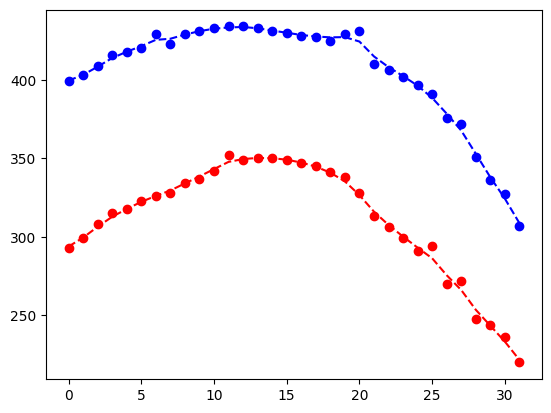

In [21]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time

measurements = np.asarray([(399,293),(403,299),(409,308),(416,315),(418,318),(420,323),(429,326),(423,328),(429,334),(431,337),(433,342),(434,352),(434,349),(433,350),(431,350),(430,349),(428,347),(427,345),(425,341),(429,338),(431,328),(410,313),(406,306),(402,299),(397,291),(391,294),(376,270),(372,272),(351,248),(336,244),(327,236),(307,220)])

initial_state_mean = [measurements[0, 0],
                      0,
                      measurements[0, 1],
                      0]

transition_matrix = [[1, 1, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 0],
                      [0, 0, 1, 0]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean)

kf1 = kf1.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)

plt.figure(1)
times = range(measurements.shape[0])
plt.plot(times, measurements[:, 0], 'bo',
         times, measurements[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'b--',
         times, smoothed_state_means[:, 2], 'r--',)
plt.show()

[[  0.    0.   20.6 -48.   39.5 -91.1]]
[[  0.    0. ]
 [ 20.6 -48. ]
 [ 39.5 -91.1]]


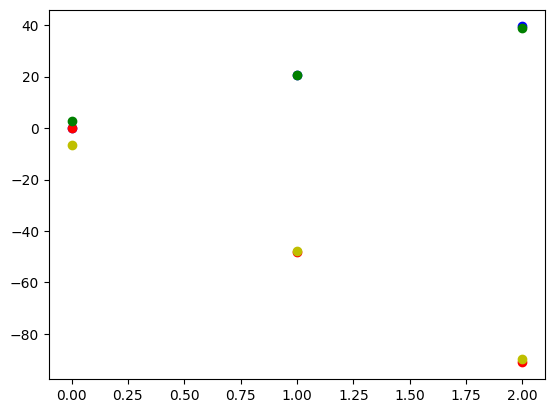

-89.82589896451168


In [24]:
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from pathlib import Path

known = 3
noise = 0

folder = "../workdir/AIS-ModelFrames/"
filename = f"aisdk-2023-11-08_xs_1_kkn"


test = pd.read_csv(f"{folder}{filename}_test_{known}_{noise}.csv")
test_y = test.loc[:,["output_x","output_y"]]
test_x = test.drop(columns=["output_x","output_y"])
text_x_time = test_x.filter(like="time")
test_x = test_x.drop(columns=text_x_time.columns)

#i = 0
#while i < known:
#    test_x = test_x.drop(columns=[f"input_{i}_time"])
#    i += 1



#measurements = np.asarray([(399,293),(403,299),(409,308),(416,315),(418,318),(420,323),(429,326),(423,328),(429,334),(431,337),(433,342),(434,352),(434,349),(433,350),(431,350),(430,349),(428,347),(427,345),(425,341),(429,338),(431,328),(410,313),(406,306),(402,299),(397,291),(391,294),(376,270),(372,272),(351,248),(336,244),(327,236),(307,220)])
#measurements = {'X':[399, 402, 209, 416, 418, 420, 429, 423, 429, 431, 433, 434, 434, 433, 431, 430, 428, 427, 425, 429, 431, 410, 406, 402, 397, 391, 376, 372, 351, 336, 327, 307],
#                'Y':[293, 299, 308, 315, 318, 323, 326, 328, 334, 337, 342, 352, 349, 350, 350, 349, 347, 345, 341, 338, 328, 313, 306, 299, 291, 294, 270, 272, 248, 244, 236, 220]}

#measurements = {'X':[399, 402, 209, 416, 418, 420],
#                'Y':[293, 299, 308, 315, 318, 323]}

#measurements = pd.DataFrame(measurements)
#print(measurements)

#measurements = np.asarray([(399,293),(403,299),(409,308)])
measurements = np.asarray(test_x)

print(measurements)

measurements = measurements.reshape((known, 2))

print(measurements)


initial_state_mean = [measurements[0, 0],
                      0,
                      measurements[0, 1],
                      0]

transition_matrix = [[1, 1, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]]

observation_matrix = [[1, 0, 0, 0],
                      [0, 0, 1, 0]]

kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  observation_matrices = observation_matrix,
                  initial_state_mean = initial_state_mean)

kf1 = kf1.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)

plt.figure(1)
times = range(measurements.shape[0])
#times = text_x_time
plt.plot(times, measurements[:, 0], 'bo',
         times, measurements[:, 1], 'ro',
         times, smoothed_state_means[:, 0], 'go',
         times, smoothed_state_means[:, 2], 'yo',)
plt.show()

#print()
#df_res[f"as_{known}w{noise}"] = np.sqrt((test_y["output_x"] - df[f"autosk_x_{known}_{noise}"])**2 + (test_y["output_y"] - df[f"autosk_y_{known}_{noise}"])**2)
        
print(smoothed_state_means[-1, 2])

In [2]:
import autosklearn
print(autosklearn.__version__)

import sklearn
print(sklearn.__version__)

from sklearn.linear_model import LinearRegression
print(sklearn.__version__)


from sklearn.neural_network import MLPRegressor
print(sklearn.__version__)



0.15.0
0.24.2
0.24.2
0.24.2
